## Assignment 9

#### Name : Raswanth S.R
#### RollNum : CB.EN.U4CSE19648

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

### Iris GNB

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [6]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()

In [9]:
gaussian.fit(X_train, y_train)

GaussianNB()

In [10]:
Y_pred = gaussian.predict(X_test) 

In [11]:
gaussian.score(X_test,y_test)

1.0

In [12]:
gaussian.predict_proba(X_test)

array([[2.44049291e-261, 1.75690913e-006, 9.99998243e-001],
       [4.62772960e-087, 9.99997509e-001, 2.49062165e-006],
       [1.00000000e+000, 5.86573779e-018, 8.16162532e-027],
       [2.96439388e-323, 1.10744521e-006, 9.99998893e-001],
       [1.00000000e+000, 3.17267813e-016, 5.32610050e-026],
       [0.00000000e+000, 1.46019193e-010, 1.00000000e+000],
       [1.00000000e+000, 4.31839423e-016, 7.65911289e-026],
       [8.09217628e-158, 7.80399392e-001, 2.19600608e-001],
       [7.24579939e-160, 9.08267456e-001, 9.17325438e-002],
       [8.90967866e-101, 9.99849842e-001, 1.50157614e-004],
       [1.04517663e-220, 4.70717779e-001, 5.29282221e-001],
       [8.85444946e-143, 9.41915811e-001, 5.80841887e-002],
       [3.77596535e-139, 9.98630652e-001, 1.36934795e-003],
       [1.30323456e-150, 9.46178914e-001, 5.38210855e-002],
       [1.08449063e-149, 9.85985808e-001, 1.40141923e-002],
       [1.00000000e+000, 3.83418804e-018, 7.85663405e-028],
       [7.01016623e-142, 9.85419351e-001

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.85714286, 0.95238095, 1.        , 0.95238095, 0.95238095])

### HR Dataset GNB

In [33]:
df = pd.read_csv("C:/Users/RASWANTH.SR/Desktop/ML Lab/FDS Lab/csv/HR_comma_sep.csv")

In [34]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [35]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [36]:
df1 = df[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary"]]
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [37]:
dummies = pd.get_dummies(df1.salary)
dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [38]:
merged = pd.concat([df1, dummies], axis=1)
final = merged.drop(["salary"], axis=1)

In [39]:
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [40]:
X = final
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [41]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [43]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()

In [44]:
gaussian.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred = gaussian.predict(X_test) 
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [46]:
gaussian.score(X_test,y_test)

0.707

In [47]:
gaussian.predict_proba(X_test)

array([[6.07472530e-01, 3.92527470e-01],
       [4.00227648e-01, 5.99772352e-01],
       [9.99999975e-01, 2.49441193e-08],
       ...,
       [7.25574277e-01, 2.74425723e-01],
       [2.23243961e-01, 7.76756039e-01],
       [4.34619202e-01, 5.65380798e-01]])

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.71625   , 0.69041667, 0.64666667, 0.69958333, 0.67819925])

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1597,  688],
       [ 191,  524]], dtype=int64)

Text(69.0, 0.5, 'Truth')

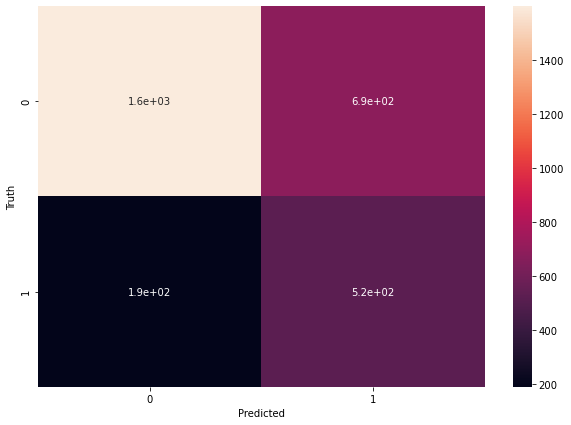

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      2285
           1       0.43      0.73      0.54       715

    accuracy                           0.71      3000
   macro avg       0.66      0.72      0.66      3000
weighted avg       0.78      0.71      0.73      3000



### Play Store Review MNB

In [25]:
df = pd.read_csv("C:/Users/RASWANTH.SR/Desktop/ML Lab/FDS Lab/csv/reviews_1.csv")

In [34]:
df

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0
...,...,...
886,loved it i loooooooooooooovvved it because it ...,1
887,all time legendary game the birthday party lev...,1
888,ads are way to heavy listen to the bad reviews...,0
889,fun works perfectly well. ads aren't as annoyi...,1


In [27]:
df.drop('package_name',axis=1,inplace=True)

In [28]:
df['review'] = df['review'].str.strip().str.lower()

In [29]:
X = df['review']
y = df['polarity']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.25, random_state=42)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')
X_train_count = vec.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [32]:
X_test_count = vec.transform(X_test)
model.score(X_test_count, y_test)

0.8565022421524664

In [35]:
review = ['Loved the app',
         'Bug issues on the app']
review_count = vec.transform(review)
model.predict(review_count)

array([1, 0], dtype=int64)